In [32]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import ROOT
from ROOT import TChain, TTree,TCanvas,TH1F,TList,TFile,TH2F,TPaveLabel,TPaveText,TLorentzVector
import gen_utils as gen_utils

In [33]:
ntuples = 'ntuples_2016_20181203'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "_node_" in s or "_nodes" in s ]

env: data=/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2016_20181203


In [30]:
print signal
signalSM='output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root'
treepath='tagsDumper/trees/'
path='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/%s/'%ntuples

['output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_10_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_11_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_12_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_13_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_2_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_3_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_4_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_5_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_6_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_7_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_8_13TeV-madgraph.root', 'output_GluGluToHHTo2B2G_reweighted_node_9_13TeV-madgraph.root']


In [30]:
#For properly done nodes like in 2017
#signal_df = []
#for i,sig in enumerate(signal):
#    treename = signal[i][signal[i].find('output_')+7:signal[i].find('.root')].replace('-','_')+'_13TeV_DoubleHTag_0'
#    df = rpd.read_root(path+signal[i],treepath+treename)
#    signal_df.append(df)

In [5]:
all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
gen_all_signal = pd.concat([gensignal_df[i] for i in range(0,len(gensignal_df))],ignore_index=True)
print all_signal.shape
print gen_all_signal.shape
rpd.to_root(all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','nodesCombined','w')
rpd.to_root(gen_all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','GenNodesCombined','a')

### Reweighted 2016 nodes 

In [34]:
path='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2016_20181203/'
file = 'output_GluGluToHHTo2B2G_reweighted_nodes_13TeV-madgraph.root'
fileSM='output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root'

In [35]:
signal_df = []
gensignal_df = []
gensignal_df_full = []
for sig in ['SM',3,4,5,8,10]:
    if sig=='SM' :
        treename='tagsDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0'
        df = rpd.read_root(path+fileSM,treename)
        gentreename='genDiphotonDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_DoubleHTag_0'
        gendf = rpd.read_root(path+fileSM,gentreename)
        gentreename2='genDiphotonDumper/trees/GluGluToHHTo2B2G_node_SM_13TeV_madgraph_13TeV_NoTag_0'
        gendf2 = rpd.read_root(path+fileSM,gentreename2)
        gendf2 = pd.concat([gendf,gendf2],ignore_index=True)

    else :
        treename = 'GluGluToHHTo2B2G_reweighted_node_%d'%sig
        df = rpd.read_root(path+file,treename)
        df['weight'] = df['weight']/12.
        
        gentreename = 'GluGluToHHTo2B2G_reweighted_node_%d_GenTagged'%sig
        gendf = rpd.read_root(path+file,gentreename)
        gendf['weight'] = gendf['weight']/12.
        
        gentreename2 = 'GluGluToHHTo2B2G_reweighted_node_%d_Gen'%sig
        gendf2 = rpd.read_root(path+file,gentreename2)
        gendf2['weight'] = gendf2['weight']/12.

   # for frame in [gendf,gendf2]:
   #     for part in "leadPho","subleadPho","leadJet","subleadJet":
   #         gen_utils.calc_p4extra(frame,part) #calculating pt, eta, phi, m for each 
   #         gen_utils.calc_sump4(frame,"hgg","leadPho","subleadPho") #calculating pt, eta, phi, m for sum of 2 photons
   #         gen_utils.calc_sump4(frame,"hbb","leadJet","subleadJet") #calculating pt, eta, phi, m for sum of 2 b jets
   #         gen_utils.calc_sump4(frame,"hh","hbb","hgg") #calculating pt, eta, phi, m for sum of 2 Higgs"
    signal_df.append(df)
    gensignal_df.append(gendf)
    gensignal_df_full.append(gendf2)

In [221]:
#When mhh was not available in the reco trees

#reco_gen_signal_df=[]
#for i in range(0,len(signal_df)):
#    signal_df[i].set_index(['lumi','event','weight'])
#    gensignal_df[i].set_index(['lumi','event','weight'])
#    reco_gen_signal_df.append(signal_df[i].merge(gensignal_df[i][['lumi','event','weight','hh_m']]))

#all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
#reco_gen = pd.concat([reco_gen_signal_df[i] for i in range(0,len(reco_gen_signal_df))],ignore_index=True)
#gen_all_signal_full = pd.concat([gensignal_df_full[i] for i in range(0,len(gensignal_df_full))],ignore_index=True)
#rpd.to_root(reco_gen,path+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root','nodesCombined','w')
#rpd.to_root(gen_all_signal_full,path+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root','GenNodesCombined','a')

In [36]:
all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
gen_all_signal_full = pd.concat([gensignal_df_full[i] for i in range(0,len(gensignal_df_full))],ignore_index=True)
rpd.to_root(all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root','nodesCombined','w')
rpd.to_root(gen_all_signal_full,path+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root','GenNodesCombined','a')

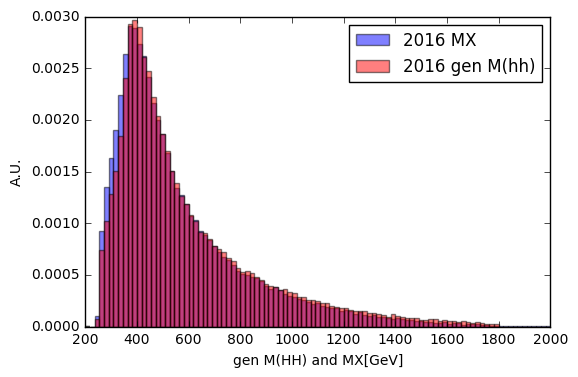

In [17]:
import matplotlib.pyplot as plt

plt.clf()

n, bins, patches = plt.hist(all_signal['MX'], np.linspace(200,2000,100), facecolor='b',weights=all_signal['weight'], alpha=0.5,normed=True,label='2016 MX')
n, bins, patches = plt.hist(all_signal['genMhh'], bins=bins, facecolor='r',weights=all_signal['weight'], alpha=0.5,normed=True,label='2016 gen M(hh)')

plt.xlabel('gen M(HH) and MX[GeV]')
plt.ylabel('A.U.')
plt.legend(loc='upper right')
plt.show()


### 2017 nodes 

In [18]:
ntuples = 'ntuples_2017_20181203'
path='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/%s/'%ntuples
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "_node_" in s ]
treepath='tagsDumper/trees/'

env: data=/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017_20181203


In [19]:
signal_df = []
for i,sig in enumerate(signal):
    if '12' in sig : continue
    print signal[i]
    treename = signal[i][signal[i].find('output_')+7:signal[i].find('.root')].replace('-','_')+'_13TeV_DoubleHTag_0'
    df = rpd.read_root(path+signal[i],treepath+treename)
    signal_df.append(df)
    #print df.shape

output_GluGluToHHTo2B2G_node_2_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_3_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_4_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_7_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_9_13TeV-madgraph_correctedcfg.root
output_GluGluToHHTo2B2G_node_SM_13TeV-madgraph.root


In [20]:
gentreepath='genDiphotonDumper/trees/'
gensignal_df = []
gensignal_df_full = []
for i,sig in enumerate(signal):
    if '12' in sig : continue
    treename = signal[i][signal[i].find('output_')+7:signal[i].find('.root')].replace('-','_')+'_13TeV_'
    df = rpd.read_root(path+signal[i],gentreepath+treename+'DoubleHTag_0')
    #for part in "leadPho","subleadPho","leadJet","subleadJet":
    #     gen_utils.calc_p4extra(df,part) #calculating pt, eta, phi, m for each 
    #     gen_utils.calc_sump4(df,"hgg","leadPho","subleadPho") #calculating pt, eta, phi, m for sum of 2 photons
    #     gen_utils.calc_sump4(df,"hbb","leadJet","subleadJet") #calculating pt, eta, phi, m for sum of 2 b jets
    #     gen_utils.calc_sump4(df,"hh","hbb","hgg") #calculating pt, eta, phi, m for sum of 2 Higgs
    gensignal_df.append(df)
    # print df.shape
    gensignal_df_full.append(df)
    gendf = rpd.read_root(path+signal[i],gentreepath+treename+'NoTag_0')
    # for part in "leadPho","subleadPho","leadJet","subleadJet":
    #     gen_utils.calc_p4extra(gendf,part) #calculating pt, eta, phi, m for each 
    #     gen_utils.calc_sump4(gendf,"hgg","leadPho","subleadPho") #calculating pt, eta, phi, m for sum of 2 photons
    #     gen_utils.calc_sump4(gendf,"hbb","leadJet","subleadJet") #calculating pt, eta, phi, m for sum of 2 b jets
    #     gen_utils.calc_sump4(gendf,"hh","hbb","hgg") #calculating pt, eta, phi, m for sum of 2 Higgs
    gensignal_df_full.append(gendf)

In [134]:
#When mhh was not available in the reco trees


#reco_gen_signal_df=[]
#for i in range(0,len(signal_df)):
#    signal_df[i].set_index(['lumi','event'])
#    gensignal_df[i].set_index(['lumi','event'])
#    reco_gen_signal_df.append(signal_df[i].merge(gensignal_df[i][['lumi','event','hh_m']], how='outer').dropna(axis='index'))
#all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
#reco_gen = pd.concat([reco_gen_signal_df[i] for i in range(0,len(reco_gen_signal_df))],ignore_index=True)
#gen_all_signal_full = pd.concat([gensignal_df_full[i] for i in range(0,len(gensignal_df_full))],ignore_index=True)
#rpd.to_root(reco_gen,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','nodesCombined','w')
#rpd.to_root(gen_all_signal_full,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','GenNodesCombined','a')

In [21]:
all_signal = pd.concat([signal_df[i] for i in range(0,len(signal_df))],ignore_index=True)
gen_all_signal_full = pd.concat([gensignal_df_full[i] for i in range(0,len(gensignal_df_full))],ignore_index=True)
rpd.to_root(all_signal,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','nodesCombined','w')
rpd.to_root(gen_all_signal_full,path+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root','GenNodesCombined','a')

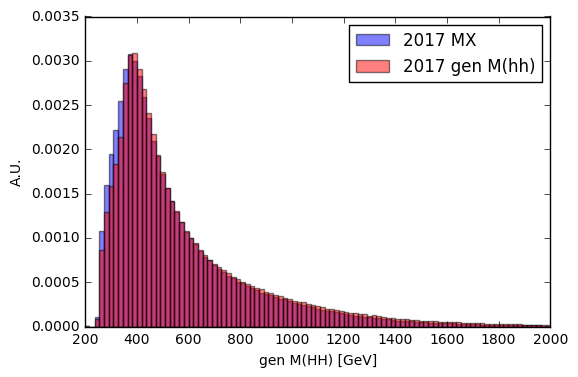

In [24]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(all_signal['MX'], np.linspace(200,2000,100), facecolor='b',weights=all_signal['weight'], alpha=0.5,normed=True,label='2017 MX')
n, bins, patches = plt.hist(all_signal['genMhh'], bins=bins, facecolor='r',weights=all_signal['weight'], alpha=0.5,normed=True,label='2017 gen M(hh)')

plt.xlabel('gen M(HH) [GeV]')
plt.ylabel('A.U.')
plt.legend(loc='upper right')
plt.show()


### Reweight 2017(with more stat) to match 2016
##### But concerving overall integral!

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


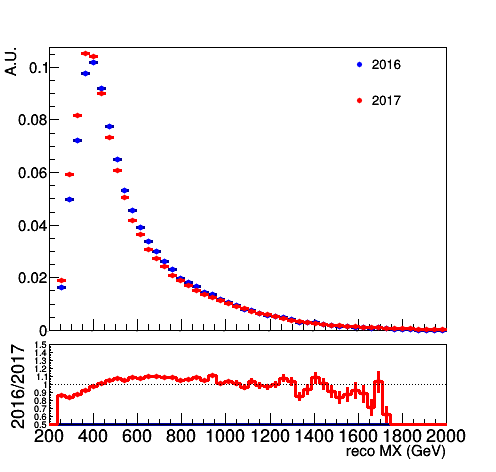

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/reweight2017_to_2016_12_11.pdf has been created


In [46]:
path_2016='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/deepCSV_01_10_2018/'
path_2017='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017_20181112/'
plot_dir = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/'
date = '12_11'
out = TFile(path_2017+'Node_reweighting_hist.root','recreate')


sum=0.
c = TCanvas("c","c",500,500)
c.SetBottomMargin(0.3)
name='nodesCombined'
infile2016 = TFile(path_2016+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root')
infile2017 = TFile(path_2017+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root')
hists_list=[]
hists_list_2017=[]


tree_2017 = infile2017.Get(name)
hist_2017 = TH1F("hist_2017","hist_2017",50,200,2000)
hist_2017.SetLineColor(2)
hist_2017.SetMarkerColor(2)
tree_2017.Draw("MX>>hist_2017","weight")
    
tree = infile2016.Get(name)
hist = TH1F("hist_2016","hist_2016",50,200,2000)
hist.SetTitle('')
hist.GetXaxis().SetTitle('reco MX (GeV)')
hist.GetYaxis().SetTitle('A.U.')
hist.GetXaxis().SetLabelSize(0)
hist.GetXaxis().SetTitleOffset(0.91)
hist.GetYaxis().SetTitleOffset(1.4)

ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetOptStat(0)
tree.Draw("MX>>hist_2016","weight")

hist.Scale(1./hist.Integral())
hist_2017.Scale(1./hist_2017.Integral())
    
hist.Draw("APsame")
hists_list.append(hist)
hist_2017.Draw("same")
hists_list_2017.append(hist_2017)


leg = ROOT.TLegend(0.7,0.75,0.9,0.9)
leg.AddEntry(hist,"2016" ,"P")
leg.AddEntry(hist_2017,"2017" ,"P")
leg.SetFillStyle(-1)
leg.SetBorderSize(0)
leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.Draw()



hist_ratio = hist.Clone("ratio")
hist_ratio.Divide(hist_2017)
hist_ratio.SetLineColor(2)
hist_ratio.SetMarkerColor(2)
 
    
    
pad2 = ROOT.TPad("pad2", "pad2", 0., 0., 1., 1.)
pad2.SetTopMargin(0.73)
pad2.SetFillColor(0)
pad2.SetFillStyle(0)
pad2.Draw()
pad2.cd()
frame2 = ROOT.TH1F("frame2","",1,200,2000)
frame2.SetMinimum(0.5)
frame2.SetMaximum(1.5)
frame2.GetYaxis().SetLabelSize(0.02)
frame2.GetXaxis().SetLabelSize(0.04)
frame2.GetYaxis().SetTitleSize(0.04)
frame2.GetXaxis().SetTitle('reco MX (GeV)')
frame2.SetStats(0)
frame2.GetYaxis().SetTitle("2016/2017")
frame2.Draw()
hist_ratio.Draw("HISTsameE")

line = ROOT.TLine(200,1,2000,1)
line.SetLineStyle(3)
line.Draw("same")


out.cd()

hist_ratio.Write()
out.Close()    

c.Draw()
c.SaveAs(plot_dir+'reweight2017_to_2016_'+date+'.pdf')



TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


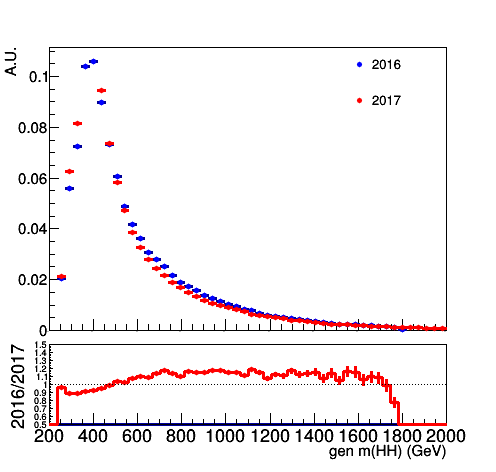

Info in <TCanvas::Print>: pdf file /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/GenMhhreweight2017_to_2016_12_11.pdf has been created


In [53]:
path_2016='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/deepCSV_01_10_2018/'
path_2017='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017data_20181023/'
path_2017='/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/ntuples_2017_20181112/'
plot_dir = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/reweighted_nodes/2016_from_hists/'
date = '12_11'
out = TFile(path_2017+'GenNode_reweighting_hist.root','recreate')


sum=0.
c = TCanvas("c","c",500,500)
c.SetBottomMargin(0.3)
name='GenNodesCombined'
infile2016 = TFile(path_2016+'output_GluGluToHHTo2B2G_SM_plus_reweighted_nodes_13TeV-madgraph.root')
infile2017 = TFile(path_2017+'output_GluGluToHHTo2B2G_SM_plus_nodes_13TeV-madgraph.root')
hists_list=[]
hists_list_2017=[]


tree_2017 = infile2017.Get(name)
hist_2017 = TH1F("hist_2017","hist_2017",50,200,2000)
hist_2017.SetLineColor(2)
hist_2017.SetMarkerColor(2)
tree_2017.Draw("hh_m>>hist_2017","weight")
    
tree = infile2016.Get(name)
hist = TH1F("hist_2016","hist_2016",50,200,2000)
hist.SetTitle('')
hist.GetXaxis().SetTitle('gen m(HH) (GeV)')
hist.GetYaxis().SetTitle('A.U.')
hist.GetXaxis().SetLabelSize(0)
hist.GetXaxis().SetTitleOffset(0.91)
hist.GetYaxis().SetTitleOffset(1.4)

ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetOptStat(0)
tree.Draw("hh_m>>hist_2016","weight")

hist.Scale(1./hist.Integral())
hist_2017.Scale(1./hist_2017.Integral())
    
hist.Draw("APsame")
hists_list.append(hist)
hist_2017.Draw("same")
hists_list_2017.append(hist_2017)


leg = ROOT.TLegend(0.7,0.75,0.9,0.9)
leg.AddEntry(hist,"2016" ,"P")
leg.AddEntry(hist_2017,"2017" ,"P")
leg.SetFillStyle(-1)
leg.SetBorderSize(0)
leg.SetTextFont(42)
leg.SetTextSize(0.03)
leg.Draw()



hist_ratio = hist.Clone("ratio")
hist_ratio.Divide(hist_2017)
hist_ratio.SetLineColor(2)
hist_ratio.SetMarkerColor(2)
 
    
    
pad2 = ROOT.TPad("pad2", "pad2", 0., 0., 1., 1.)
pad2.SetTopMargin(0.73)
pad2.SetFillColor(0)
pad2.SetFillStyle(0)
pad2.Draw()
pad2.cd()
frame2 = ROOT.TH1F("frame2","",1,200,2000)
frame2.SetMinimum(0.5)
frame2.SetMaximum(1.5)
frame2.GetYaxis().SetLabelSize(0.02)
frame2.GetXaxis().SetLabelSize(0.04)
frame2.GetYaxis().SetTitleSize(0.04)
frame2.GetXaxis().SetTitle('gen m(HH) (GeV)')
frame2.SetStats(0)
frame2.GetYaxis().SetTitle("2016/2017")
frame2.Draw()
hist_ratio.Draw("HISTsameE")

line = ROOT.TLine(200,1,2000,1)
line.SetLineStyle(3)
line.Draw("same")


out.cd()

hist_ratio.Write()
out.Close()    

c.Draw()
c.SaveAs(plot_dir+'GenMhhreweight2017_to_2016_'+date+'.pdf')

